## 회귀분석 ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

%matplotlib inline

In [3]:
ds_repair = pd.read_csv("실습파일/부품수리시간.csv", engine = 'python')
ds_repair

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


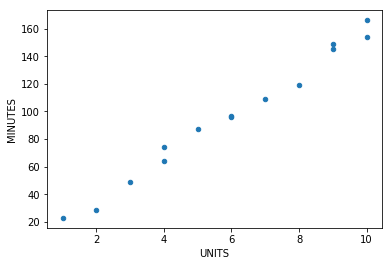

In [6]:
ds_repair.plot.scatter(x="UNITS", y="MINUTES")

In [7]:
ds_repair.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [8]:
ds_repair_x = ds_repair["UNITS"]
ds_repair_y = ds_repair["MINUTES"]

ds_repair_x_const = sm.add_constant(ds_repair_x)

reg_model = sm.OLS(ds_repair_y, ds_repair_x_const)
reg_results = reg_model.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           8.92e-13
Time:                        16:46:42   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


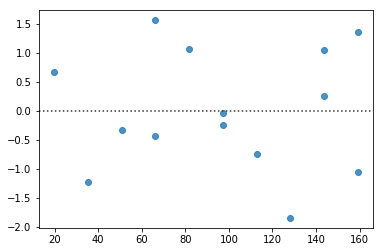

In [49]:
z = (reg_results.resid - np.mean(reg_results.resid))/np.std(reg_results.resid)
sns.residplot(reg_results.fittedvalues,z)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-9.23182957, -6.17919799, -5.24937343, -3.72305764, -2.19674185,
         -1.68796992, -1.21428571, -0.21428571,  1.2593985 ,  3.32957393,
          5.2593985 ,  5.29448622,  6.75062657,  7.80325815])),
 (5.48747823811458, -2.2838873649431793e-14, 0.9900152558575118))

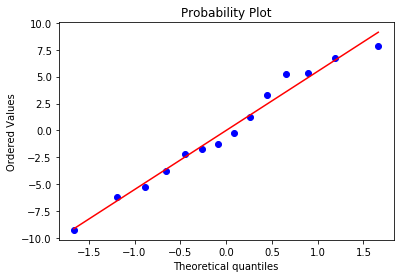

In [45]:
resid = reg_results.resid
stats.probplot(resid, plot=plt)

In [47]:
test = sm.stats.omni_normtest(reg_results.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  0.746
P-value     :  0.689


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


##  다중 회귀 분석 ##

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

In [52]:
ds_health = pd.read_csv("실습파일/체질검사.csv", engine = 'python')
ds_health.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [53]:
ds_health_y = ds_health["FAT"]
ds_health_x = ds_health.drop("FAT", axis = 1, inplace = False)

print("목표변수 데이터 크기: {}".format(ds_health_y.shape))
print("설명변수 데이터 크기: {}".format(ds_health_x.shape))

목표변수 데이터 크기: (252,)
설명변수 데이터 크기: (252, 13)


In [56]:
ds_health_x_const = sm.add_constant(ds_health_x)
ds_health_x_const.head()

,const,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1.0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,1.0,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,1.0,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,1.0,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,1.0,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


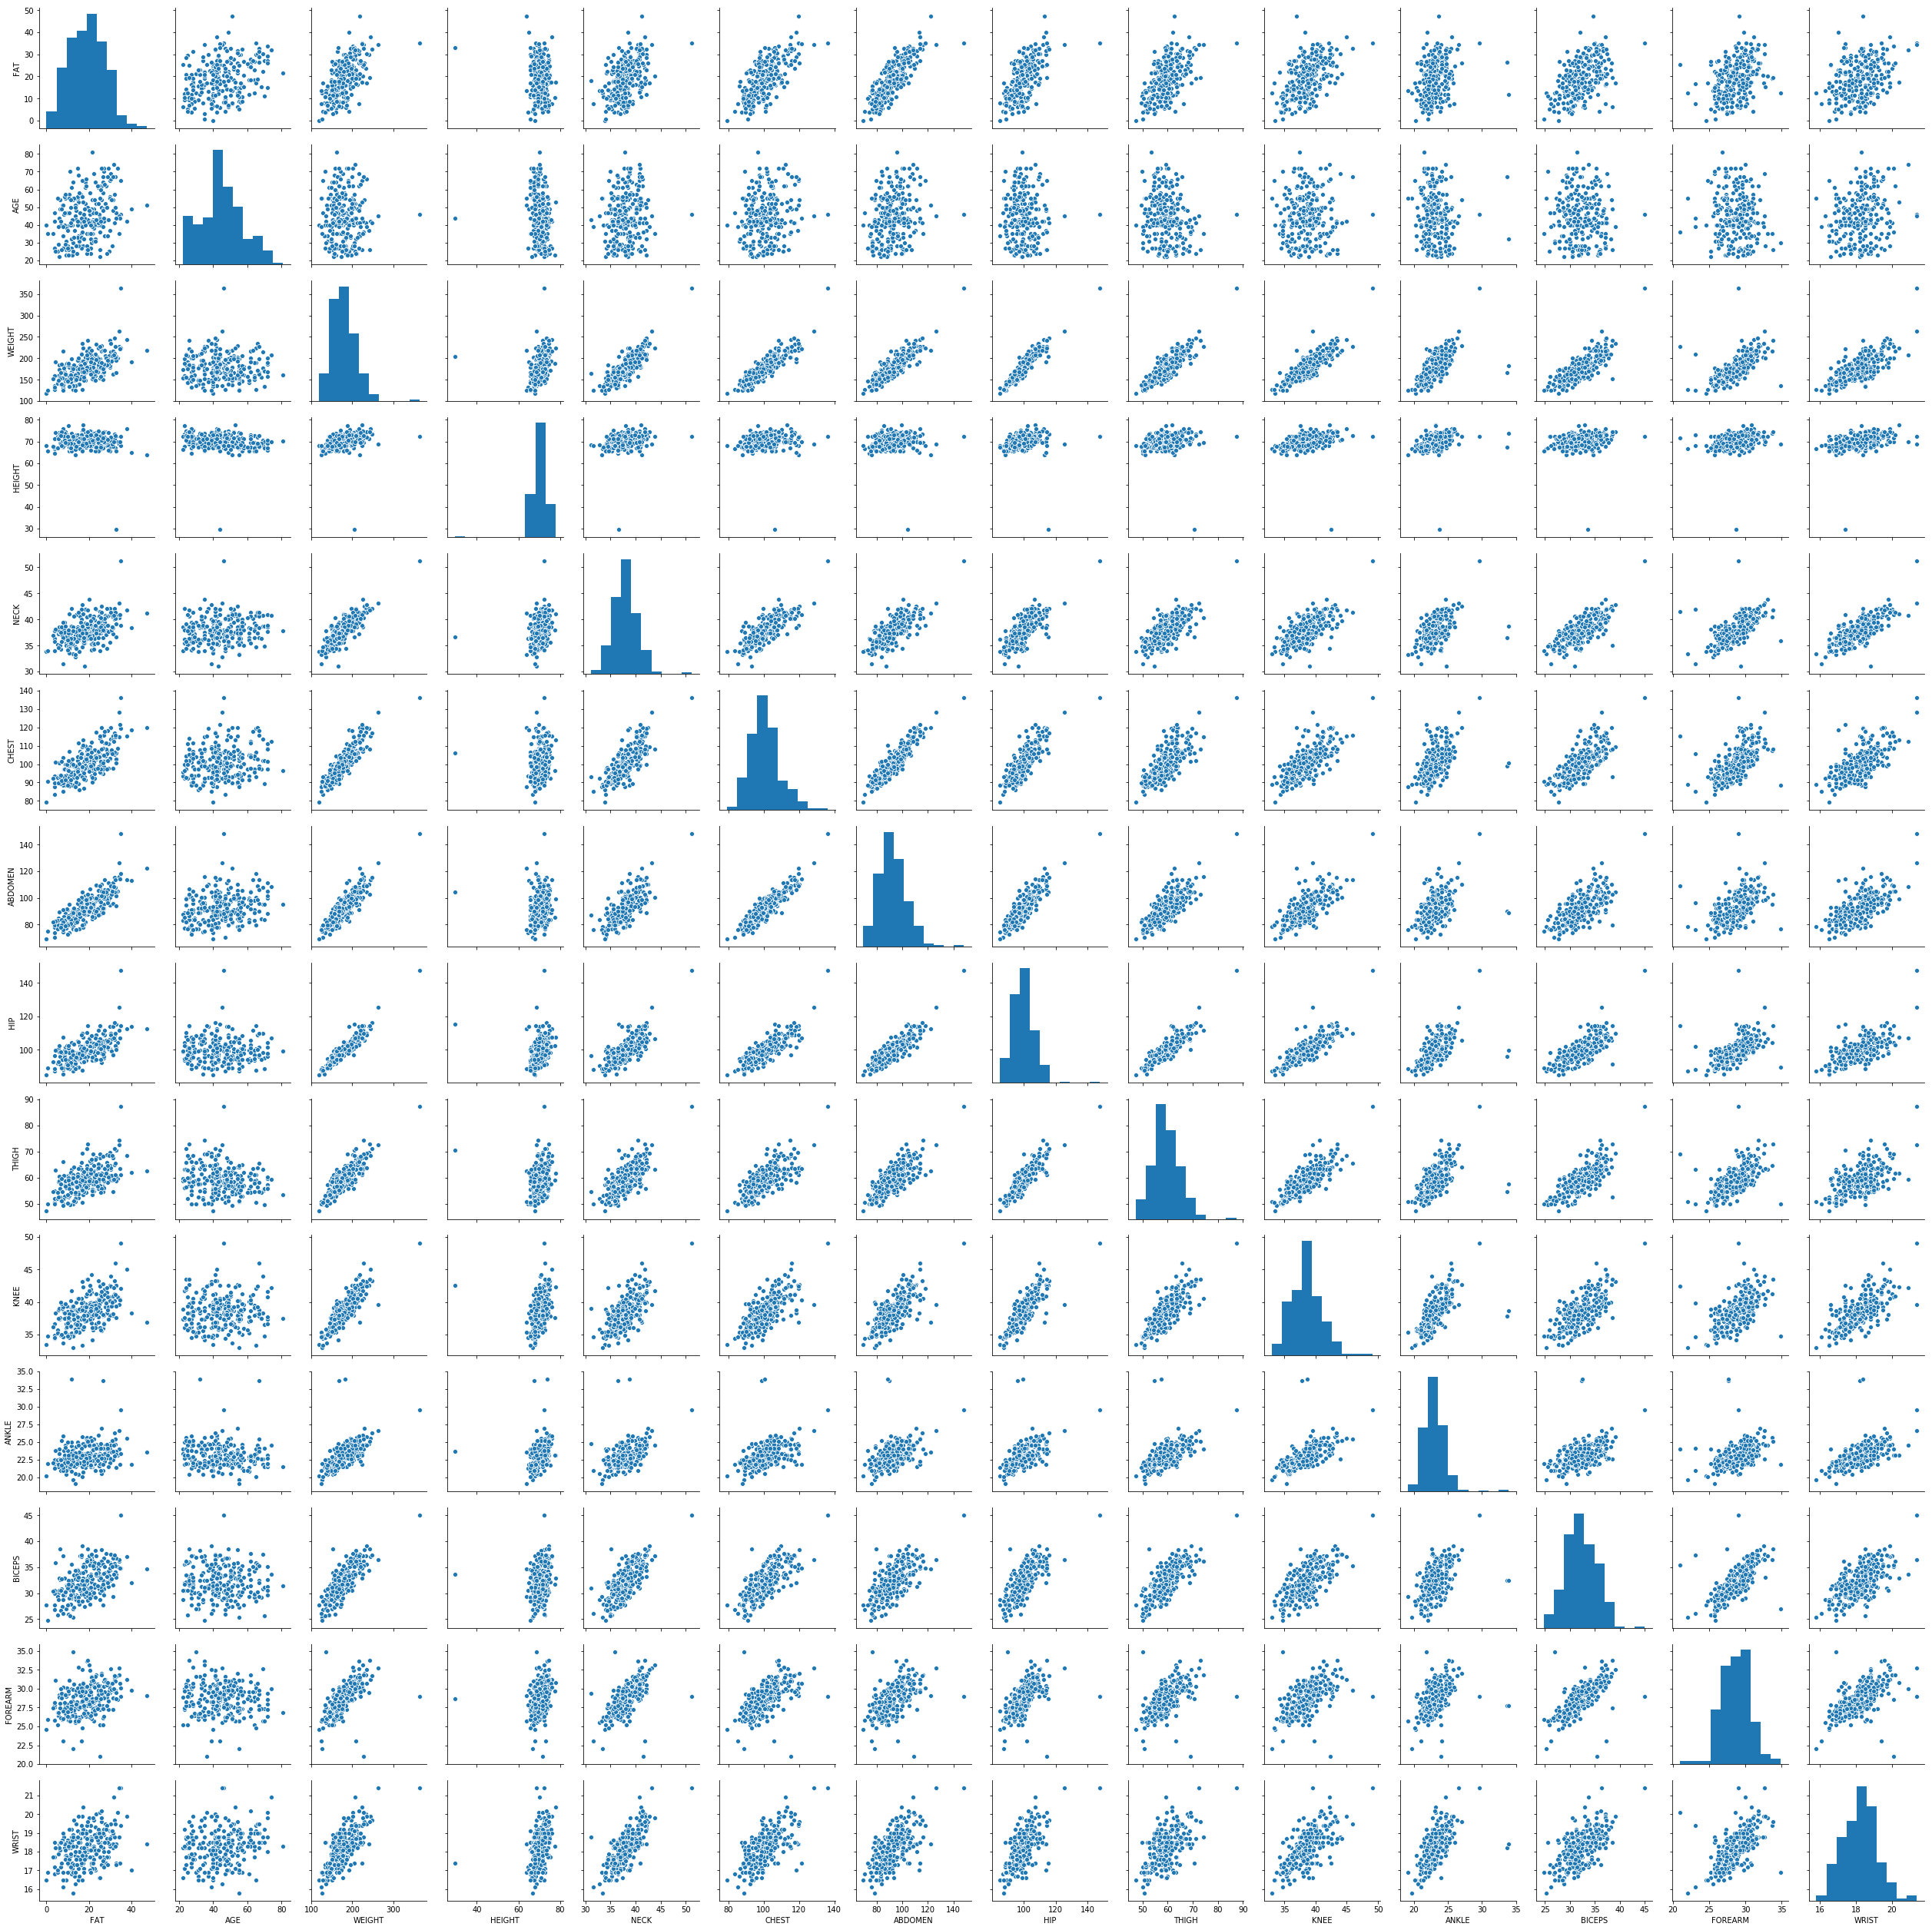

In [54]:
sns.pairplot(ds_health)

In [55]:
ds_health.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [57]:
reg_multi_model = sm.OLS(ds_health_y, ds_health_x_const)

reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           7.72e-64
Time:                        10:24:28   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

In [83]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_health_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(ds_health_x_const.values, i) for i in range(ds_health_x_const.shape[1])]

ds_vif.sort_values("VIF", inplace = True)
ds_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [59]:
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=5).fit(ds_health_x, ds_health_y)

selected_cols =ds_health_x.columns[rfe.support_]
removed_cols =ds_health_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [61]:
ds_health_x_rfe = sm.add_constant(ds_health_x_const[selected_cols])

reg_multi_rfe_model = sm.OLS(ds_health_y, ds_health_x_rfe)

reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.38e-68
Time:                        10:45:34   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7037      6.231      0.434      0.6

In [62]:
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif["variable"] = ds_health_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(ds_health_x_rfe.values, i) for i in range(ds_health_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF", inplace = True)
ds_rfe_vif.round(3)

,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


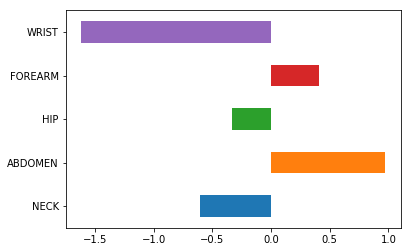

In [78]:
ds_reg_coef = pd.DataFrame({"Coef": reg_multi_rfe_results.params.values[1:]},
                           index = reg_multi_rfe_model.exog_names[1:])
ds_reg_coef.plot.barh(y = "Coef", legend = False)

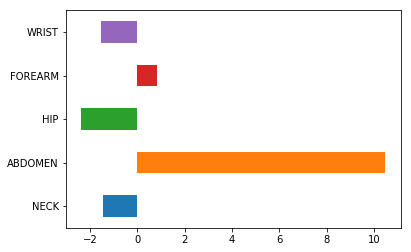

In [80]:
ds_health_x_scaled = scale(ds_health_x_const[selected_cols])

ds_health_x_scaled = sm.add_constant(ds_health_x_scaled)

reg_multi_scaled_model = sm.OLS(ds_health_y, ds_health_x_scaled)

reg_multi_scaled_results =reg_multi_scaled_model.fit()

ds_reg_scaled_coef = pd.DataFrame({"Coef": reg_multi_scaled_results.params.values[1:]},
                           index = reg_multi_rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

In [81]:
import statsmodels.formula.api as smf

formula_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + FOREARM + WRIST", data = ds_health)
formula_result = formula_model.fit()
print(formula_result.summary()) # hip 이 빠지면서 결정계수가 줄어든 것을 알 수 있다.

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     154.1
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           6.80e-66
Time:                        11:26:57   Log-Likelihood:                -734.77
No. Observations:                 252   AIC:                             1480.
Df Residuals:                     247   BIC:                             1497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4679      5.959     -1.085      0.2

In [82]:
formula_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + FOREARM + WRIST + HIP", data = ds_health)
formula_result = formula_model.fit()
print(formula_result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.38e-68
Time:                        11:31:45   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

## ARIMA ##


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

In [85]:
ds_currency = pd.read_csv('실습파일/환율.csv', engine = 'python', encoding ='EUC-KR', parse_dates =["APPL_DATE"])
ds_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


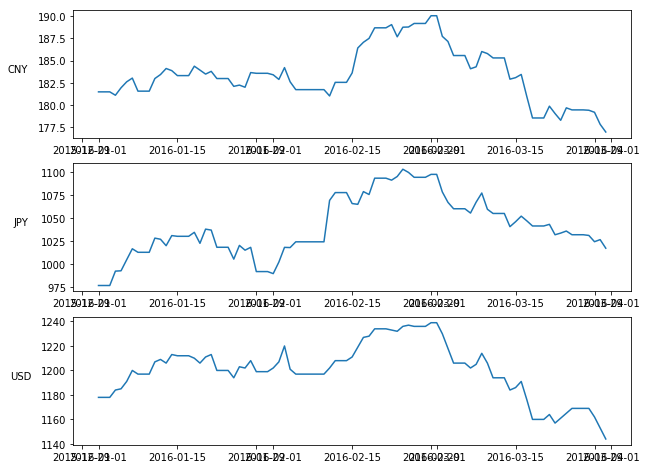

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(10,8))
for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY", "JPY","USD"]):
    ax.plot("APPL_DATE", "STD_RATE", data = ds_currency[ds_currency["CURRENCY"]==currency])
    ax.set_ylabel(currency, rotation = 0, labelpad =20)

In [89]:
ds_currency_CNY = ds_currency[ds_currency["CURRENCY"]=='CNY'].set_index("APPL_DATE")
ds_currency_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

ds_currency_JPY = ds_currency[ds_currency["CURRENCY"]=='JPY'].set_index("APPL_DATE")
ds_currency_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

ds_currency_USD = ds_currency[ds_currency["CURRENCY"]=='USD'].set_index("APPL_DATE")
ds_currency_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
ds_currency_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


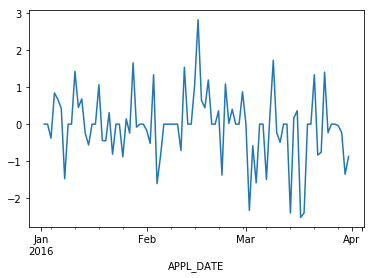

In [92]:
ds_cny_diff1 = ds_currency_CNY["STD_RATE"] - ds_currency_CNY["STD_RATE"].shift(1)
ds_cny_diff1.plot()

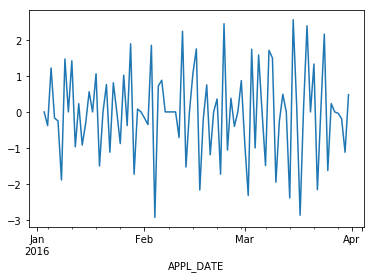

In [96]:
ds_cny_diff2 = ds_currency_CNY["STD_RATE"] - 2*(ds_currency_CNY["STD_RATE"].shift(1)) +\
                                               (ds_currency_CNY["STD_RATE"].shift(2))
ds_cny_diff2.plot()

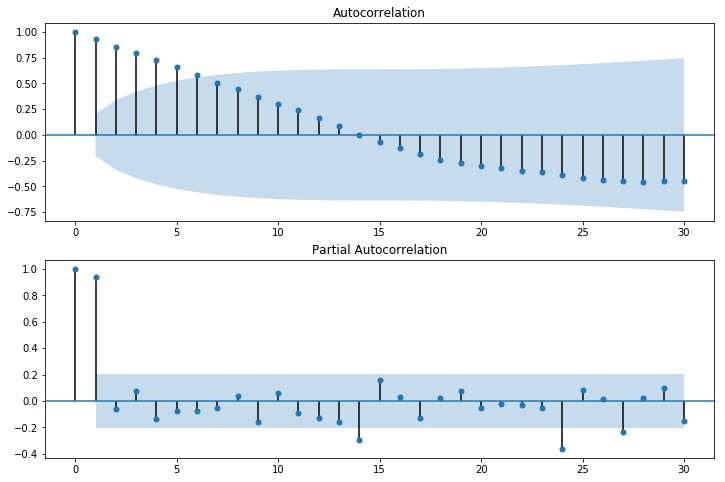

In [99]:
lag_size =30
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(ds_currency_CNY["STD_RATE"], lags=lag_size, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(ds_currency_CNY["STD_RATE"], lags=lag_size, ax=ax2)

In [100]:
ts_model_cny = ARIMA(ds_currency_CNY, order=(1, 2, 0))

ts_result_cny = ts_model_cny.fit(trend ="c", full_output = True, disp = 1)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   89
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -135.890
Method:                       css-mle   S.D. of innovations              1.113
Date:                Wed, 30 Jan 2019   AIC                            277.779
Time:                        15:27:54   BIC                            285.245
Sample:                    01-03-2016   HQIC                           280.788
                         - 03-31-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0115      0.083     -0.138      0.890      -0.174       0.151
ar.L1.D2.STD_RATE    -0.4273      0.095     -4.501      0.000      -0.613      -0.241
                        

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


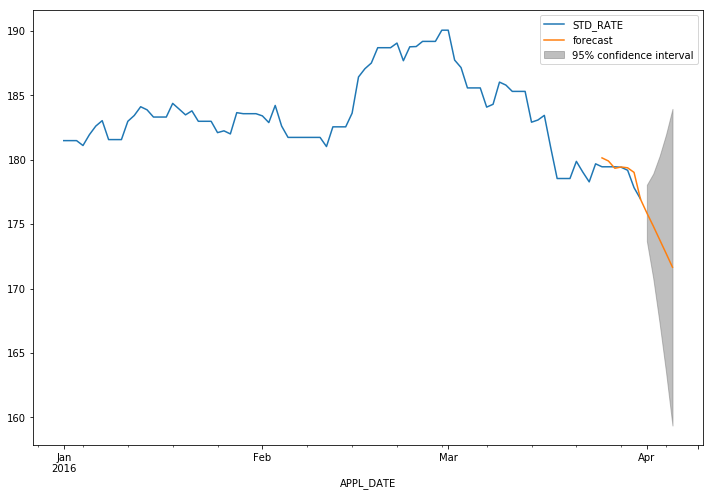

In [105]:
start_time = datetime.strptime("2016-03-25T00:00:00", "%Y-%m-%dT%H:%M:%S")
end_time = datetime.strptime("2016-04-05T00:00:00", "%Y-%m-%dT%H:%M:%S")
fig, ax = plt.subplots(figsize = (12, 8))

ax = ds_currency_CNY.plot(ax = ax)
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax = ax, plot_insample=False)